In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
from numpy import nan as NaN


# the following is the code that write those two databases, separately

In [2]:
#this step will cost minuites to download database from internet and write them into this notebook
import public
df_Ref_2019, df_Sample_2019, df_Data_2019 = public.fetch_Putze2019()
df_Ref_2021, df_Sample_2021, df_Data_2021 = public.fetch_Putze2021_mmc1()

C:\Users\84746\anaconda3\envs\pygmt\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [3]:
print(len(df_Data_2019))
print(len(df_Data_2021))

609566
604553


In [4]:
df_Sample_2019_Key = df_Sample_2019.rename(columns={'Sample-Ref':'Ref_Sample_Key'})
df_Data_2019_Key = df_Data_2019.rename(columns={'Sample-Ref ID':'Ref_Sample_Key'})

df_Data_2019_ID = df_Data_2019_Key.drop_duplicates(subset=['Ref_Sample_Key'], keep='first')
print(len(df_Data_2019_ID))
df_Data_2019_ID = df_Data_2019_ID[['Ref_Sample_Key']]
df_detrital_2019 = pd.merge(df_Data_2019_ID,df_Sample_2019_Key,on='Ref_Sample_Key')
print(len(df_detrital_2019))

7788
7788


In [5]:
df_detrital_2019 = df_detrital_2019[df_detrital_2019['Mineral'] == 'zircon']
df_detrital_2019= df_detrital_2019[df_detrital_2019['Class-1 Rock Type'] == 'detrital']
df_detrital_2019['Class-1 Rock Type'].value_counts()

detrital    7788
Name: Class-1 Rock Type, dtype: int64

In [6]:
print(len(df_detrital_2019))
df_detrital_2019_dropna = df_detrital_2019.dropna(subset=['Est. Depos. Age (Ma)'])
print(len(df_detrital_2019_dropna))

7788
7778


In [7]:
df_Data_2019_detrital = pd.merge(df_detrital_2019_dropna,df_Data_2019_Key,on='Ref_Sample_Key')
print(len(df_Data_2019_detrital))
#add a new column named 'count' in the sample sheet
count = df_Data_2019_detrital['Ref_Sample_Key'].value_counts()
data1 = {'Ref_Sample_Key':count.index, 'U-Pb Record Count':count}
df1 = pd.DataFrame(data1)
print(len(df1))
df_detrital_2019_count = pd.merge(df_detrital_2019_dropna,df1,on='Ref_Sample_Key')
# this step give up 328 samples without data of each zircon grain

print(len(df_detrital_2019_count))

609219
7778
7778


In [8]:
# the aim of the follow 7 lines is making sure that the EDA of modern_sediment wounldn't be None
df_sed = df_detrital_2019_count[df_detrital_2019_count['Class-2 Rock Type'] != 'modern_sediment' ]
print(len(df_sed))

#there are 10 samples (from 3 papers) don't have EDA, but we didn't delete them since they will be delete when we filter the data between 0-410 Ma
#df_sed.dropna(subset=['Est. Depos. Age (Ma)'],inplace=True)

# this step give up 10 samples without Estmitate Depositional Age
print(len(df_sed))
df_mod = df_detrital_2019_count[df_detrital_2019_count['Class-2 Rock Type'] == 'modern_sediment' ]
df_mod = df_mod.copy()

print(len(df_mod))
df_mod['Est. Depos. Age (Ma)'].fillna(0.0, inplace=True)
print(len(df_mod))

df_s2019 = df_sed.append(df_mod)
df_s2019 = df_s2019.sort_index()

df_detrital_2019_count_da = df_s2019
print(len(df_detrital_2019_count_da))

6804
6804
974
974
7778


In [9]:
df_detrital_2019_refno = df_detrital_2019_count_da[['Ref No.']]
df_Ref_2019_detrital = pd.merge(df_detrital_2019_refno,df_Ref_2019,on='Ref No.')
df_Ref_2019_detrital = df_Ref_2019_detrital.drop_duplicates(subset=['Ref No.','Title','Web Link','Data_Link'], keep='first')
df_Ref_2019_detrital = df_Ref_2019_detrital.rename(columns={'Ref No.':'Ref No. In Source Database'})
len(df_Ref_2019_detrital)

1341

In [10]:
df_Ref_2019_detrital.index.values
df_Ref_2019_detrital.reset_index(drop=True, inplace=True)
key1 = df_Ref_2019_detrital.index.values
df_Ref_2019_detrital.insert(0,'Ref Number',key1)
Ref_No = df_Ref_2019_detrital[['Ref Number','Ref No. In Source Database']]

print(len(df_detrital_2019_count_da))
df_detrital_2019_count_da = df_detrital_2019_count_da.rename(columns={'Ref No.':'Ref No. In Source Database'})
df_detrital_2019_count_da['Source Database'] = 'Puetz et al,2019'
print(len(df_detrital_2019_count_da))

df_detrital_2019_count_da_ref = pd.merge(df_detrital_2019_count_da,Ref_No,on='Ref No. In Source Database')
print(len(df_detrital_2019_count_da_ref))

cols = list(df_detrital_2019_count_da_ref)
cols.insert(0, cols.pop(cols.index('Ref Number')))
df_detrital_2019_count_da_ref = df_detrital_2019_count_da_ref.loc[:, cols]

print(len(df_detrital_2019_count_da_ref))

7778
7778
7778
7778


siliciclastic       4685
meta_sedimentary    2032
modern_sediment      974
glacial               46
misc_sediments        25
carbonate             16
Name: Class-2 Rock Type, dtype: int64


(0.0, 200.0)

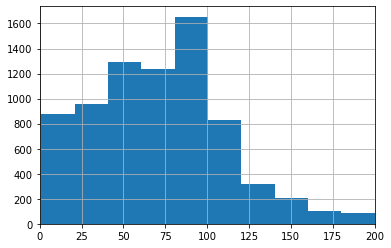

In [11]:
print(df_detrital_2019_count_da_ref['Class-2 Rock Type'].value_counts())
df_detrital_2019_count_da_ref['U-Pb Record Count'].hist(bins = 50)
plt.xlim(0,200)

In [29]:
a = df_Ref_2019_detrital.index.to_list()
len(a)

1341

In [14]:
df_Sample_2021_Key = df_Sample_2021.rename(columns={'Ref-Sample Key':'Ref_Sample_Key'})
df_Data_2021_Key = df_Data_2021.rename(columns={'Ref-Sample Key':'Ref_Sample_Key'})

df_Data_2021_ID = df_Data_2021_Key.drop_duplicates(subset=['Ref_Sample_Key'], keep='first')
print(len(df_Data_2021_ID))
df_Data_2021_ID = df_Data_2021_ID[['Ref_Sample_Key']]
df_detrital_2021 = pd.merge(df_Data_2021_ID,df_Sample_2021_Key,on='Ref_Sample_Key')
print(len(df_detrital_2021))

6427
6427


In [15]:
df_detrital_2021_refno = df_Sample_2021[['Ref No.']]
print(len(df_Ref_2021))
df_Ref_2021_detrital = pd.merge(df_detrital_2021_refno,df_Ref_2021,on='Ref No.')
df_Ref_2021_detrital = df_Ref_2021_detrital.drop_duplicates(subset=['Ref No.','Title'], keep='first')
len(df_Ref_2021_detrital)

1123


851

In [16]:
df_Ref_2021_detrital = df_Ref_2021_detrital.rename(columns={'Ref No.':'Ref No. In Source Database'})

df_Ref_2021_detrital.reset_index(drop=True, inplace=True)
key3 = range(1341, len(df_Ref_2021_detrital)+1341)
# 1396 is the length of df_detrital_2019
df_Ref_2021_detrital.insert(0,'Ref Number',key3)

In [17]:
Ref_No = df_Ref_2021_detrital[['Ref Number','Ref No. In Source Database']]
df_detrital_2021 = df_detrital_2021.rename(columns={'Ref No.':'Ref No. In Source Database'})
df_detrital_2021['Source Database'] = 'Puetz et al,2021'

df_detrital_2021 = pd.merge(df_detrital_2021,Ref_No,on='Ref No. In Source Database')

cols = list(df_detrital_2021)
cols.insert(0, cols.pop(cols.index('Ref Number')))
df_detrital_2021 = df_detrital_2021.loc[:, cols]

In [18]:
len(df_detrital_2021)
# there are 6439 zircon samples in database of puetz2021

6427

# the following is the code that combine those two databases into one database DZDB0

In [19]:
df_Ref_2019_detrital['Pages'] = None
df_Ref_2019_detrital['Source_Database'] = 'Puetz et al,2019'
df_Ref_2021_detrital['First Page'] = None
df_Ref_2021_detrital['Last Page'] = None
df_Ref_2021_detrital['Data_Link'] = None
df_Ref_2021_detrital['Source_Database'] = 'Puetz et al,2021'

df_ABC2019 = df_Ref_2019_detrital
df_ABC2021 = df_Ref_2021_detrital
data_ref = {'Ref_Number':df_ABC2019['Ref Number'].append(df_ABC2021['Ref Number']).to_list(),
         'Ref No. In_Source_Database':df_ABC2019['Ref No. In Source Database'].append(df_ABC2021['Ref No. In Source Database']).to_list(),
         'Lead_Author':df_ABC2019['Lead_Author'].append(df_ABC2021['Lead_Author']).to_list(),
         'Year':df_ABC2019['Year'].append(df_ABC2021['Year']).to_list(),
         'Journal':df_ABC2019['Journal'].append(df_ABC2021['Journal']).to_list(),
         'Volume':df_ABC2019['Volume'].append(df_ABC2021['Vol.']).to_list(),
         'Pages':df_ABC2019['Pages'].append(df_ABC2021['Pages']).to_list(),
         'First_Page':df_ABC2019['First Page'].append(df_ABC2021['First Page']).to_list(),
         'Last_Page':df_ABC2019['Last Page'].append(df_ABC2021['Last Page']).to_list(),
         'Title':df_ABC2019['Title'].append(df_ABC2021['Title']).to_list(),
         'Web_Link':df_ABC2019['Web Link'].append(df_ABC2021['Web Link']).to_list(),
         'Data_Link':df_ABC2019['Data_Link'].append(df_ABC2021['Data_Link']).to_list(),
         'Source_Database':df_ABC2019['Source_Database'].append(df_ABC2021['Source_Database']).to_list()
        }
df_ref = pd.DataFrame(data_ref)

In [20]:
df_detrital_2019_count_da_ref['Min. Depos. Age (Ma)'] = None
df_detrital_2019_count_da_ref['Spectrometer Location'] = None
df_detrital_2019_count_da_ref['Institution'] = None
df_detrital_2019_count_da_ref['Spectrometer Model'] = None
df_detrital_2021['Max Latitude'] = None
df_detrital_2021['Min Latitude'] = None
df_detrital_2021['Max Longitude'] = None
df_detrital_2021['Min Longitude'] = None
df_detrital_2021['Felsic/Mafic'] = None

df_ABC2019 = df_detrital_2019_count_da_ref
df_ABC2021 = df_detrital_2021
data_sample = {'Ref_Number':df_ABC2019['Ref Number'].append(df_ABC2021['Ref Number']).to_list(),
             'Ref_Sample_Key':df_ABC2019['Ref_Sample_Key'].append(df_ABC2021['Ref_Sample_Key']).to_list(),
             'Ref No. In_Source_Database':df_ABC2019['Ref No. In Source Database'].append(df_ABC2021['Ref No. In Source Database']).to_list(),
             'Sample No. In_Source_Database':df_ABC2019['Sample No.'].append(df_ABC2021['Unique Sample No.']).to_list(),
             'Source_Database':df_ABC2019['Source Database'].append(df_ABC2021['Source Database']).to_list(),
             'Published Sample_ID':df_ABC2019['Sample_ID'].append(df_ABC2021['Published Sample_ID']).to_list(),
             'Country/State':df_ABC2019['Country'].append(df_ABC2021['Country/State']).to_list(),
             'Region':df_ABC2019['Region'].append(df_ABC2021['Region']).to_list(),
             'Continent':df_ABC2019['Continent'].append(df_ABC2021['Continent']).to_list(),
             'Major Geographic-Geologic Description':df_ABC2019['Major Geographic-Geologic Description'].append(df_ABC2021['Major Geographic-Geologic Description']).to_list(),
             'Minor Geologic-Geographic Unit':df_ABC2019['Minor Geologic-Geographic Unit'].append(df_ABC2021['Minor Geologic-Geographic Unit']).to_list(),
             'Locality':df_ABC2019['Locality'].append(df_ABC2021['Locality']).to_list(),
             'Latitude':df_ABC2019['Latitude'].append(df_ABC2021['Latitude']).to_list(),
             'Longitude':df_ABC2019['Longitude'].append(df_ABC2021['Longitude']).to_list(),
             'Max. Depos. Age (Ma)':df_ABC2019['Max. Depos. Age (Ma)'].append(df_ABC2021['Max. Depos. Age (Ma)']).to_list(),
             'Est. Depos. Age (Ma)':df_ABC2019['Est. Depos. Age (Ma)'].append(df_ABC2021['Est. Depos. Age (Ma)']).to_list(),
             'Min. Depos. Age (Ma)':df_ABC2019['Min. Depos. Age (Ma)'].append(df_ABC2021['Min. Depos. Age (Ma)']).to_list(),
             'Mineral':df_ABC2019['Mineral'].append(df_ABC2021['Mineral']).to_list(),
             'Mass Spectrometer':df_ABC2019['Mass Spectrometer'].append(df_ABC2021['Mass Spectrometer']).to_list(),
             'Spectrometer Location':df_ABC2019['Spectrometer Location'].append(df_ABC2021['Spectrometer Location']).to_list(),
             'Institution':df_ABC2019['Institution'].append(df_ABC2021['Institution']).to_list(),
             'Spectrometer Model':df_ABC2019['Spectrometer Model'].append(df_ABC2021['Spectrometer Model']).to_list(),
             'Class-1 Rock Type':df_ABC2019['Class-1 Rock Type'].append(df_ABC2021['Class-1 Rock Type']).to_list(),
             'Class-2 Rock Type':df_ABC2019['Class-2 Rock Type'].append(df_ABC2021['Class-2 Rock Type']).to_list(),
             'Class-3 Rock Type':df_ABC2019['Class-3 Rock Type'].append(df_ABC2021['Class-3 Rock Type']).to_list(),
             'Felsic/Mafic':df_ABC2019['Felsic/Mafic'].append(df_ABC2021['Felsic/Mafic']).to_list(),
             'Max Latitude':df_ABC2019['Max Latitude'].append(df_ABC2021['Max Latitude']).to_list(),
             'Min Latitude':df_ABC2019['Min Latitude'].append(df_ABC2021['Min Latitude']).to_list(),
             'Max Longitude':df_ABC2019['Max Longitude'].append(df_ABC2021['Max Longitude']).to_list(),
             'Min Longitude':df_ABC2019['Min Longitude'].append(df_ABC2021['Min Longitude']).to_list(),
             'U-Pb Record Count':df_ABC2019['U-Pb Record Count'].append(df_ABC2021['U-Pb Record Count']).to_list()
        }
df_sample = pd.DataFrame(data_sample)
df_sample.reset_index(drop=True, inplace=True)
key1 = df_sample.index.values
df_sample.insert(0,'Sample_No.',key1)

In [21]:
df_Data_2019['Spot diam. (μm)'] = None
df_Data_2019['Source_Database'] = 'Puetz et al,2019'
df_Data_2021['Source_Database'] = 'Puetz et al,2021'

df_ABC2019 = df_Data_2019
df_ABC2021 = df_Data_2021
data_grain = {'Ref_Sample_Key':df_ABC2019['Sample-Ref ID'].append(df_ABC2021['Ref-Sample Key']).to_list(),
               'Sample&Grain':df_ABC2019['Sample & Grain'].append(df_ABC2021['Sample&Grain']).to_list(),
               'Core/Rim':df_ABC2019['Core/Rim'].append(df_ABC2021['Spot']).to_list(),
               'Spot diam. (μm)':df_ABC2019['Spot diam. (μm)'].append(df_ABC2021['Spot diam. (μm)']).to_list(),               
               'Published 206Pb/238U age (Ma)':df_ABC2019['206Pb/238U Age (Ma)'].append(df_ABC2021['Published 206Pb/238U age (Ma)']).to_list(),               
               'Published 206Pb/238U 2σ uncert.':df_ABC2019['Uncert. (2σ)'].append(df_ABC2021['Published 206Pb/238U 2σ uncert.']).to_list(),               
               'Published 207Pb/235U age (Ma)':df_ABC2019['207Pb/235U Age (Ma)'].append(df_ABC2021['Published 207Pb/235U age (Ma)']).to_list(),               
               'Published 207Pb/235U 2σ uncert.':df_ABC2019['Uncert. (2σ).1'].append(df_ABC2021['Published 207Pb/235U 2σ uncert.']).to_list(),               
               'Published 207Pb/206Pb age (Ma)':df_ABC2019['207Pb/206Pb Age (Ma)'].append(df_ABC2021['Published 207Pb/206Pb age (Ma)']).to_list(),               
               'Published 207Pb/206Pb 2σ uncert.':df_ABC2019['Uncert. (2σ).2'].append(df_ABC2021['Published 207Pb/206Pb 2σ uncert.']).to_list(),           
               'Source_Database':df_ABC2019['Source_Database'].append(df_ABC2021['Source_Database']).to_list()
        }
df_grain = pd.DataFrame(data_grain)
df_grain.reset_index(drop=True, inplace=True)
key1 = df_grain.index.values
df_grain.insert(0,'Grain_No.',key1)               
               

In [22]:
# we divide the df_grain into two sheets since the size of df_grain is more than the limition of excel
df_grain1 = df_grain[df_grain['Source_Database'] == 'Puetz et al,2019']
df_grain2 = df_grain[df_grain['Source_Database'] == 'Puetz et al,2021']

with pd.ExcelWriter(r"data/DZDB0.xlsx") as writer:
    df_ref.to_excel(writer,sheet_name='References',index = False)
    df_sample.to_excel(writer,sheet_name='Samples',index = False)
    df_grain1.to_excel(writer,sheet_name='UPb_Data1',index = False)
    df_grain2.to_excel(writer,sheet_name='UPb_Data2',index = False)

# the following is the code that add a column named 'Standard_Model_Age' as the best age for each zircon grains DZDB1

In [9]:
df_Ref = pd.read_excel('data/DZDB0.xlsx',sheet_name="References")
df_Sample = pd.read_excel('data/DZDB0.xlsx',sheet_name="Samples")
df_Data1 = pd.read_excel('data/DZDB0.xlsx',sheet_name="UPb_Data1")
df_Data2 = pd.read_excel('data/DZDB0.xlsx',sheet_name="UPb_Data2")

In [ ]:
print(len(df_Ref))
print(len(df_Sample))
df_Data = df_Data1.append(df_Data2)
len(df_Data)

In [11]:
Sample_ID = df_Data1['Grain_No.']
Sample_ID = Sample_ID.to_list()

Standard_Model_Age=[]
sigma = []
for i in Sample_ID:
    Sample_age = df_Data1[df_Data1['Grain_No.'] == i]
    if ~np.isnan(Sample_age.loc[i,'Published 206Pb/238U age (Ma)']):
        if Sample_age.loc[i,'Published 206Pb/238U age (Ma)'] < 1200:
            Standard_Model_Age.append(Sample_age.loc[i,'Published 206Pb/238U age (Ma)'])
            sigma.append(Sample_age.loc[i,'Published 206Pb/238U 2σ uncert.'])
            
        elif Sample_age.loc[i,'Published 206Pb/238U age (Ma)'] >= 1200:
            Standard_Model_Age.append(Sample_age.loc[i,'Published 207Pb/206Pb age (Ma)'])
            sigma.append(Sample_age.loc[i,'Published 207Pb/206Pb 2σ uncert.'])
    
    elif ~np.isnan(float(Sample_age.loc[i,'Published 207Pb/206Pb age (Ma)'])):
        if Sample_age.loc[i,'Published 207Pb/206Pb age (Ma)'] >= 1200:
            Standard_Model_Age.append(Sample_age.loc[i,'Published 207Pb/206Pb age (Ma)'])        
            sigma.append(Sample_age.loc[i,'Published 207Pb/206Pb 2σ uncert.'])
        else:
            Standard_Model_Age.append(NaN)      
            sigma.append(NaN)
    else:
            Standard_Model_Age.append(NaN)
            sigma.append(NaN)
df_Data1.insert(5,'Standard_Model_Age',Standard_Model_Age)
df_Data1.insert(6,'Standard_Model_Age 2σ uncert.',sigma)


In [12]:
Sample_ID = df_Data2['Grain_No.']
Sample_ID = Sample_ID.to_list()

Standard_Model_Age=[]
sigma = []
for i in Sample_ID:
    Sample_age = df_Data2[df_Data2['Grain_No.'] == i]
    if ~np.isnan(Sample_age.loc[i-609566,'Published 206Pb/238U age (Ma)']):
        if Sample_age.loc[i-609566,'Published 206Pb/238U age (Ma)'] < 1200:
            Standard_Model_Age.append(Sample_age.loc[i-609566,'Published 206Pb/238U age (Ma)'])
            sigma.append(Sample_age.loc[i-609566,'Published 206Pb/238U 2σ uncert.'])
        elif Sample_age.loc[i-609566,'Published 206Pb/238U age (Ma)'] >= 1200:
            Standard_Model_Age.append(Sample_age.loc[i-609566,'Published 207Pb/206Pb age (Ma)'])
            sigma.append(Sample_age.loc[i-609566,'Published 207Pb/206Pb 2σ uncert.'])
    
    elif ~np.isnan(float(Sample_age.loc[i-609566,'Published 207Pb/206Pb age (Ma)'])):
        if Sample_age.loc[i-609566,'Published 207Pb/206Pb age (Ma)'] >= 1200:
            Standard_Model_Age.append(Sample_age.loc[i-609566,'Published 207Pb/206Pb age (Ma)'])        
            sigma.append(Sample_age.loc[i-609566,'Published 207Pb/206Pb 2σ uncert.'])
        else:
            Standard_Model_Age.append(NaN)      
            sigma.append(NaN)
    else:
            Standard_Model_Age.append(NaN)
            sigma.append(NaN)
df_Data2.insert(5,'Standard_Model_Age',Standard_Model_Age)
df_Data2.insert(6,'Standard_Model_Age 2σ uncert.',sigma)
#df_Data2.dtypes

In [ ]:
a = df_Data1['Standard_Model_Age 2σ uncert.']
new_a = [x/2 for x in a] 
df_Data1.insert(7,'Standard_Model_Age 1σ uncert.',new_a)

a = df_Data2['Standard_Model_Age 2σ uncert.']
new_a = [x/2 for x in a] 
df_Data2.insert(7,'Standard_Model_Age 1σ uncert.',new_a)

In [27]:
#df_Sample_ = df_Data1[np.logical_and(df_Data1['Published 206Pb/238U age (Ma)'] >= 1000 , df_Data1['Published 206Pb/238U age (Ma)'] <= 1200 )]
#df_Sample_[['Published 206Pb/238U age (Ma)', 'Published 207Pb/206Pb age (Ma)']]

In [28]:
print(len(df_Data1))
df_Data1_ = df_Data1.dropna(subset=['Standard_Model_Age'])
print(len(df_Data1_))

print(len(df_Data2))
df_Data2_ = df_Data2.dropna(subset=['Standard_Model_Age'])
print(len(df_Data2_))

df_Data_ = df_Data1_.append(df_Data2_)
len(df_Data_)

609566
604371
604553
604552


1208923

In [32]:
df_Data_Key = df_Data_[['Ref_Sample_Key']]
df_Data_detrital = pd.merge(df_Sample,df_Data_Key,on='Ref_Sample_Key')
print(len(df_Data_detrital))
#add a new column named 'count' in the sample sheet
count = df_Data_detrital['Ref_Sample_Key'].value_counts()
data1 = {'Ref_Sample_Key':count.index, 'U-Pb Record Count Standard_Model_Age':count}
df1 = pd.DataFrame(data1)
df_detrital_count = pd.merge(df_Sample,df1,on='Ref_Sample_Key')

print(len(df_detrital_count))

1208576
14197


In [33]:
df_detrital_count_refno = df_detrital_count[['Ref_Number']]
print(len(df_detrital_count_refno))
df_Ref_detrital = pd.merge(df_detrital_count_refno,df_Ref,on='Ref_Number')

count = df_Ref_detrital['Ref_Number'].value_counts()
data1 = {'Ref_Number':count.index, 'Sample Count Standard_Model_Age':count}
df1 = pd.DataFrame(data1)
df_Ref_detrital = pd.merge(df_Ref,df1,on='Ref_Number')

len(df_Ref_detrital)

14197


2189

In [ ]:
import DZ_TectonicSettings as dzts
df_Sample_ABC = dzts.get_category_CAWOOD(df_Sample = df_detrital_count, key_column = 'Ref_Sample_Key', DA = 'Est. Depos. Age (Ma)', df_Data = df_Data, CA = 'Standard_Model_Age', category_column='type')

In [ ]:
# show the distribution of samples in time
A_dataframe = df_Sample_ABC[df_Sample_ABC['type']=='A']
B_dataframe = df_Sample_ABC[df_Sample_ABC['type']=='B']
C_dataframe = df_Sample_ABC[df_Sample_ABC['type']=='C']

fig, ax = plt.subplots(1, 4, figsize = (16,4))
dataframe=[df_Sample_ABC,A_dataframe,B_dataframe,C_dataframe]
color = ['grey','r','b','g']
labels=['All-Sample','Category A','Category B','Category C']
for i in range(4):
    ax[i].hist(dataframe[i]['Est. Depos. Age (Ma)'], histtype='bar', bins = 38, color = color[i], edgecolor='white', label=labels[i],stacked=True)
    ax[i].legend(loc = 'best')
    ax[i].set_xlabel('DA (Ma)')
    ax[i].set_ylabel('Frequency')
    #ax[i].set_xticks(range(0,500,50))
    #ax[i].set_yticks(range(0,80,20))
    #ax[i].set_xlim(0,410)
plt.tight_layout()
plt.show()

In [34]:
with pd.ExcelWriter(r"data/DZDB1.xlsx") as writer:
    df_Ref_detrital.to_excel(writer,sheet_name='References',index = False)
    df_Sample_ABC.to_excel(writer,sheet_name='Samples',index = False)
    df_Data1_.to_excel(writer,sheet_name='UPb_Data1',index = False)
    df_Data2_.to_excel(writer,sheet_name='UPb_Data2',index = False)

# the following is the code that filter a new database from DB1 under our conditions, and save as DZDB2


In [38]:
df_Ref = pd.read_excel('data/DZDB1.xlsx',sheet_name="References")
df_Sample = pd.read_excel('data/DZDB1.xlsx',sheet_name="Samples")
df_Data1 = pd.read_excel('data/DZDB1.xlsx',sheet_name="UPb_Data1")
df_Data2 = pd.read_excel('data/DZDB1.xlsx',sheet_name="UPb_Data2")


In [39]:
print(len(df_Ref))
print(len(df_Sample))
print(len(df_Data1))
print(len(df_Data2))

2189
14197
604371
604552


In [40]:
df_Data = df_Data1.append(df_Data2)
len(df_Data)

1208923

In [41]:
df_Sample_410 = df_Sample[np.logical_and(df_Sample['Est. Depos. Age (Ma)'] >= 0 , df_Sample['Est. Depos. Age (Ma)'] <= 410 )]
print(len(df_Sample_410))
df_Sample_60 = df_Sample_410[df_Sample_410['U-Pb Record Count Standard_Model_Age'] >= 60]
print(len(df_Sample_60))

8493
6400


In [42]:
df_Sample_60_refno = df_Sample_60[['Ref_Number']]
df_Ref_detrital = pd.merge(df_Sample_60_refno,df_Ref,on='Ref_Number')
df_Ref_detrital = df_Ref_detrital.drop_duplicates(subset=['Ref_Number','Title'], keep='first')
print(len(df_Ref_detrital))


909

In [43]:
df_Sample_60_refsample = df_Sample_60[['Ref_Sample_Key']]
df_Data_detrital = pd.merge(df_Sample_60_refsample,df_Data,on='Ref_Sample_Key')
print*len(df_Data_detrital))

735799

In [118]:
with pd.ExcelWriter(r"data/DZDB2.xlsx") as writer:
    df_Ref_detrital.to_excel(writer,sheet_name='References',index = False)
    df_Sample_60.to_excel(writer,sheet_name='Samples',index = False)
    df_Data_detrital.to_excel(writer,sheet_name='UPb_Data',index = False)